# Precipitation Data Modeling



- Probability Estimation Modeling
- Design Storms

## Discrete Data Analysis

Figure XX below is a representation of some continuous process.  To extract values by measurements only occurs at discrete points in time. These samples are reconstructed in a variety of ways to restore the original representation.

<figure align="center">
<!--<img src="./data_repr.png" width="400" > -->
<img src="http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson04/data_repr.png" width="400"> <figcaption>Figure XX. Data representations </figcaption>
</figure>

Real data are always some kind of discrete sample

- The “pulse” type is typical – and is called incremental data.
- For instance, incremental rainfall would be the catch over some time interval ($\Delta t$ in the figure)
- An alternative way to represent the data is with a cumulative representation (which is the running sum of the incremental data)

Figure XX below depicts the relationship between incremental and cumulative representations. Each “block” represents the amount of rainfall for the time interval
- The collection of blocks is called “incremental” rainfall (red)
- The running sum of the blocks is the cumulative distribution (blue)

A particular blocck is indicated with a height of about one, and time duration also one.  If for instance the block represents a depth the implication is that after one hour (from time 4 to 5 in the drawing) the depth added to some location is one unit. 

<figure align="center">
<!--<img src="./incr-cum-repr.png" width="400" > -->
<img src="http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson04/incr-cum-repr.png" width="400"> <figcaption>Figure XX. Data representations </figcaption>
</figure>

If these are watershed inches, then the drawing sugests that from hour zero to one, zero inches of precipitation occur, from hour one to two, about 1/4 inch; from hour 2 to 3, about 0.4 inch; from hour 3 to 4, about 0.7 inch; and hour 4 to 5; 1 inch; and so on.  If we tabulated the information we would have

|Time| Incremental Depth (Red)| Accumulated Depth (Blue)|
|---:|---:|---:|
|0|0.00|0.00|
|1|0.25|0.00|
|2|0.40|0.25|
|3|0.70|0.65|
|4|1.00|1.35|
|5|0.50|2.35|

Accumulating (running sum) the incremental is called “aggregation” (or just plain numerical integration); Differencing the cumulative is called “disaggregation.” For practical application its often handy to zero pad the leading and trailing edges so don’t have to worry too about forward/backward differencing issues.  

### Computational Thinking (ENGR-1330) - Accumulation

Consider the need to accumulate data such as:

|Time (hours)| Incremental Depth (inches)| Accumulated Depth (inches)|
|---:|---:|---:|
|0|0.121||
|1|0.121||
|2|0.132||
|3|0.154||
|4|0.165||
|5|0.187||
|6|0.198||
|7|0.242||
|8|0.297||
|9|0.374||
|10|0.594||
|11|4.708||
|12|1.199||
|13|0.528||
|14|0.374||
|15|0.286||
|16|0.253||
|17|0.209||
|18|0.176||
|19|0.154||
|20|0.132||
|21|0.132||
|22|0.132||
|23|0.132||
|24|0.000||

Our goal is to complete the last column, in this case its relatively straight forward because the time spacing is uniform.  The approach is to perform numerical integration using rectangular panels looking backward in time.

$$acc_{i}=inc_{i-1}+acc_{i-1}$$


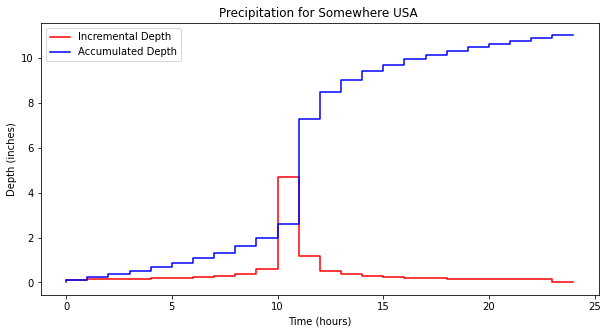

In [1]:
time=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
increment=[0.121,0.121,0.132,0.154,0.165,0.187,0.198,0.242,0.297,0.374,0.594,4.708,1.199,0.528,0.374,0.286,0.253,0.209,0.176,0.154,0.132,0.132,0.132,0.132,0]
accumulate=[0 for i in range(len(time))]

for i in range(1,len(time)):
    accumulate[i] = accumulate[i-1]+increment[i-1]


import matplotlib.pyplot as plt # the python plotting library
plottitle ='Precipitation for Somewhere USA ' 
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, increment, c='red',drawstyle='steps') # step plot
plt.plot(time, accumulate, c='blue',drawstyle='steps') # step plot
plt.xlabel('Time (hours)')
plt.ylabel('Depth (inches)')
plt.legend(['Incremental Depth','Accumulated Depth'])
plt.title(plottitle)
plt.show()

## Risk-Based Design Concepts

### Probability Estimation Modeling

1. [Probability Estimation Modeling - I](http://54.243.252.9/ce-3354-webroot/3-Readings/ProbabilityEstimationModeling/cive6361_week_006_A.pdf)
2. [Probability Estimation Modeling - II](http://54.243.252.9/ce-3354-webroot/3-Readings/ProbabilityEstimationModeling/cive6361_week_006_B.pdf)
3. [Design Rainfall](http://54.243.252.9/ce-3354-webroot/3-Readings/DesignRainfallEssay/DesignRainfall.pdf)
4. [Rainfall Intensity for Design](http://54.243.252.9/ce-3354-webroot/3-Readings/TRB-2008-Paper/TRB_2008_IntensityDesign_Rev2.pdf)
5. [Empirical Hyetographs](http://54.243.252.9/ce-3354-webroot/3-Readings/EmpiricalHyetographs/sir2004-5075.pdf)
6. [DDF-Texas](http://54.243.252.9/ce-3354-webroot/3-Readings/USGS-Texas-DDF-Theory/wri98-4044.pdf) 
7. [Texas DDF Atlas](http://54.243.252.9/ce-3354-webroot/3-Readings/USGS-Texas-DDF-Atlas/sir2004-5041.pdf)
8. [Texas DDF Atlas on-line](http://54.243.252.9/toolbox/hydrology/TexasDDFAtlas/TexasDDFAtlas.html)
9. [NOAA PFDS](https://hdsc.nws.noaa.gov/hdsc/pfds/)


## Point Precipitation 



## Design Storms

## References

1. [Chow, V.T., Maidment,D.M., and Mays, L.W. (1998) Applied Hydrology, McGraw Hill, (Read pages 26 to 31; 416 to 423)](http://54.243.252.9/ce-3354-webroot/3-Readings/CMM1988/) 

2. [McCuen, R.H., Johnson, P.A., and Ragan, R.M. (2002) Highway Hydrology. HDS-2 (2ed) FHWA-NHI-02-001 (Read pages 3-1 to 3-5; 4-86 to 4-89; 5-1 to 5-8; 5-16 to 5-17)](http://54.243.252.9/ce-3354-webroot/3-Readings/FHWAHighwayHydrology/FHWA-NHI-02-001.pdf)

3. [Texas Hydraulic Design Manual (2014-1) Texas Department of Transportation. (2014) Hydraulic Design Manual (Read pages 4-1 to 4-5; 4-31 to 4-35)](http://54.243.252.9/ce-3354-webroot/3-Readings/TXDOT-HYDM-2014/txdot-hdm-2014.pdf)

4. [Linear Theory of Hydrologic Systems Dooge, J.C. I. (1973) Linear Theory of Hydrologic Systems. USDA ARS Technical Bulletin No. 1468. (Read pages 127 to 147)](http://54.243.252.9/ce-3354-webroot/3-Readings/LS1973/linear-systems-hydrology-dooge.pdf)

5. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Discrete Data Analysis; Risk Based Design; Regression Equations)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture05.pdf)

6. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Probability Estimation Modeling)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture06.pdf)

7. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Point Precipitation; Design Storms)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture08.pdf)
